# Genetic Algorithm Basic

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DNA_size = 10
POP_size = 10
cross_rate = 0.8
mutation_rate = 0.03
n_generations = 200
x_bound = [0, 5]

In [3]:
def f(x):
    return np.sin(10*x)*x + np.cos(2*x)*x

In [4]:
def get_fitness(pred):
    return pred + 1e-3 - np.min(pred)

In [5]:
def translateDNA(pop):
    return pop.dot(2**np.arange(DNA_size)[::-1]) / float(2**DNA_size - 1) * x_bound[1]

In [6]:
def select(pop, fitness):
    index = np.random.choice(np.arange(POP_size), size=POP_size, replace=True, p=fitness/fitness.sum())
    return pop[index]

In [7]:
def crossover(parent, pop):
    if np.random.rand() < cross_rate:
        i_ = np.random.randint(0, POP_size, size=1)
        cross_points = np.random.randint(0, 2, DNA_size).astype(np.bool)
        parent[cross_points] = pop[i_, cross_points]
    return parent

In [8]:
def mutate(child):
    for point in range(DNA_size):
        if np.random.rand() < mutation_rate:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [9]:
pop = np.random.randint(2, size=(POP_size, DNA_size))

In [10]:
translateDNA(pop)

array([ 4.46236559,  0.32258065,  1.4173998 ,  4.13000978,  2.55620723,
        2.04301075,  3.66080156,  1.27565982,  2.62463343,  2.88856305])

Most fitted DNA: [1 0 0 0 0 1 1 0 0 1] = 2.624633431085044
Most fitted DNA: [1 0 0 0 0 1 1 0 1 0] = 2.6295210166177907
Most fitted DNA: [1 0 0 0 0 1 1 1 0 0] = 2.6392961876832843
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 1 1] = 2.653958944281525
Most fitted DNA: [1 0 0 0 0 1 1 1 1 1] = 2.653958944281525
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 0 0 0 1 1 1 0 1] = 2.644183773216031
Most fitted DNA: [1 0 1 0 0 1 1 1 0 0] = 3.2649071358748776
Most fitted DNA: [1 0 1 0 0 1 1 1 0 0] = 3.2649071358748776
Most fitted DNA: [1 0 1 0 0 1 1 1 0 0] = 3.2649071358748776
Most fitted DNA: [1 0 1 0 0 1 1 1 1 0] = 3.274682306940371
Most fitted DNA: [1 0 1 0 0 1 1 1 1 0] = 3.27468230

Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 1 0 0] = 3.304007820136852
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 1 1] = 3.2991202346041053
Most fitted DNA: [1 0 1 0 1 0 0 0 1 1] = 3.2991202346041053
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 1 0 0] = 3.304007820136852
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 0 1] = 3.2893450635386117
Most fitted DNA: [1 0 1 0 1 0 0 0 1 1] = 3

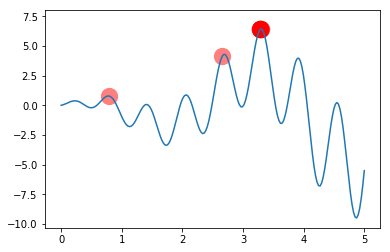

In [11]:
plt.ion()
x = np.linspace(*x_bound, 200)
plt.plot(x, f(x))

for _ in range(n_generations):
    f_values = f(translateDNA(pop))
    
    if 'sca' in globals():
        sca.remove()
    sca = plt.scatter(translateDNA(pop), f_values, s=300, lw=0, c='red', alpha=0.5)
#     plt.pause(0.05)
    
    fitness = get_fitness(f_values)
    print('Most fitted DNA: {} = {}'.format(pop[np.argmax(fitness),:], translateDNA(pop[np.argmax(fitness),:])))
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent = child

plt.ioff()
plt.show()